# Lab 4 - SVMs, NN, CNN
# Tensorflow Neural Network example on Fisher Iris Dataset

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2021-11-08 14:35:47.739626: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-08 14:35:47.739654: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Load in the Iris data and divide it into training and testing sets

In [2]:
iris_data = np.load('Iris_data.npy')
iris_labels = np.load('Iris_labels.npy')

X_trn, X_tst, y_trn, y_tst = train_test_split(iris_data, iris_labels, test_size=0.2)


##### Print out some stats about the data

In [3]:
print(f'Number of features: {X_trn.shape[1]}')
print(f'Number of training samples: {X_trn.shape[0]}')
print(f'Number of testing samples: {X_tst.shape[0]}')
print(f'Number of classes: {len(np.unique(y_trn))}')
print(f'Minimums of the features are: {X_trn.min(0)}')
print(f'Maximums of the features are: {X_trn.max(0)}')

Number of features: 4
Number of training samples: 120
Number of testing samples: 30
Number of classes: 3
Minimums of the features are: [4.3 2.  1.  0.1]
Maximums of the features are: [7.9 4.2 6.7 2.5]


##### Plot the first two feautre dimensions against eachother, colouring by class label

Text(0.5, 1.0, 'Original Data')

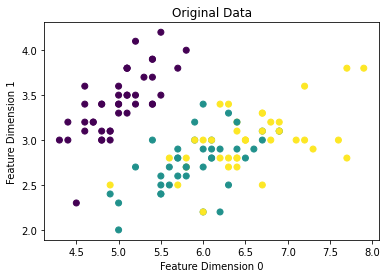

In [4]:
plt.figure()
plt.scatter(X_trn[:,0], X_trn[:,1], c=y_trn)
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')
plt.title('Original Data')

## Data Standardisation

#### The loaded data is not standardised, as can be seen by the range covered in each feature dimension. 
Often it can be useful to standardise our feature dimensions to give them a mean of zero and a scaled variance. Many algorithms, or components of an model, presume a zero-centred and scaled variance domain. applying this standardisation can often be critical to efficient learning.

#### We can use StandardScaler from the sklearn package to standardise our data based on the observed training samples.
First, we will create a `StandardScaler` object. We then `fit` it to our training data, and then `transform` both our training and testing data using this fit model.

In [5]:
## Normalise the data (helps with convergence)
normaliser = StandardScaler()
X_trn = normaliser.fit_transform(X_trn)
X_tst = normaliser.transform(X_tst)

Minimums of the features are: [-1.8579814  -2.447817   -1.52952479 -1.391379  ]
Maximums of the features are: [2.60613409 2.60080556 1.71047198 1.72219638]


Text(0.5, 1.0, 'Standardised Data')

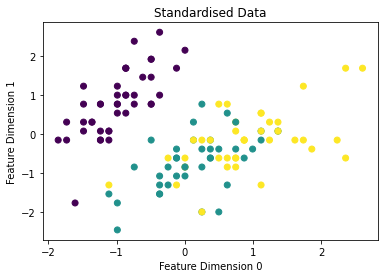

In [6]:

print(f'Minimums of the features are: {X_trn.min(0)}')
print(f'Maximums of the features are: {X_trn.max(0)}')

plt.figure()
plt.scatter(X_trn[:,0], X_trn[:,1], c=y_trn)
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')
plt.title('Standardised Data')

## Building a Tensorflow Keras model

##### Now we want to create a Fully-Connected Neural Network
In this section we will create an instance of a `tensorflow.keras.Sequential` model. Sequential allows us to pass in a list of the layers we would like to apply, in the order we wish to apply them. This is an easy way to build very simple networks, where one layer is sequentially called on the outputs of the previous layer.

Here we create an instance of the `Sequential` class, passing the constructor a list of the layers we wish to use. These layers are all implemented within `tensorflow.keras.layers`. For this example, we only use `Dense` layers, which is a fully connected layer. As we can see, each layer in the list is actually a constructor call, creating their own instance of a `Dense` object/layer in our model. This example creates a neural network with 2 hidden layers (with sizes 4 and 10 respectively), and an output layer of size `len(np.unique(y_trn))` (our number of classes in the dataset).

In this example, the `Dense` layers takes as input to its constructor call: the number of units/neurons, and the activation function we wish to apply to the layer's output before it is fed to the next layer in the list. 

In [7]:
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(4, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(y_trn)), activation=tf.nn.softmax)])

2021-11-08 14:35:49.636494: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-08 14:35:49.636523: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-08 14:35:49.636544: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Batum-Laptop): /proc/driver/nvidia/version does not exist
2021-11-08 14:35:49.636736: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Now we need to compile our model, providing it with an optimiser, loss and metrics to train with
We call the `compile()` method of our Sequential model object, passing in values for the arguments `optimizer`, `loss`, and `metrics`.

* `optimizer` is an instance of a `tensorflow.keras.optimizers` class, and describes the optimization strategy used during the training of the model. In this example we use Stochastic Gradient Descent.
* `loss` is an instance of a `tensorflow.keras.losses` class, and describes the loss to be used by the optimiser when training. In this example we use Sparse Categorical Cross-entropy, as our targets are class labels (i.e. not one-hot encoded)
* `metric` is an instance of a `tensorflow.keras.metrics` class, and describes the accuracy metric we wish to calculate between our predictions and the ground truth. In this example we use Sparse Catergorical Accuracy as we want our accuracy to reflect the proportion of samples labelled correctly.

In [8]:
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

#### Now we can train out model, by calling the `fit()` function.
We pass in our data (`X_trn`), target labels (`y_trn`), and a integer representing how many epochs we want to train our model to.

We also pass a float value, `validation_split`, between 0.0 and 1.0 to further divide our training data into a training and validation set. The validation set is then used by the `fit()` method to evaluate how the model is progressing during training. This will help is see whether over- or under-fitting is occuring. 

We also set `verbose` to 1, so that we see the training progress printed to the console. 

The final thing we do is save the returned `tensorflow.keras.callbacks.History` object into the variable called history. This will let us view and plot the training curves later.

In [9]:
history = model.fit(X_trn, y_trn, epochs=100, validation_split=0.2, verbose=1)

2021-11-08 14:35:49.846428: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
3/3 [==============================] - 0s 80ms/step - loss: 1.1447 - sparse_categorical_accuracy: 0.3229 - val_loss: 1.0233 - val_sparse_categorical_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 1.1306 - sparse_categorical_accuracy: 0.3229 - val_loss: 1.0193 - val_sparse_categorical_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 12ms/step - loss: 1.1178 - sparse_categorical_accuracy: 0.3229 - val_loss: 1.0155 - val_sparse_categorical_accuracy: 0.4583
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 1.1061 - sparse_categorical_accuracy: 0.3229 - val_loss: 1.0119 - val_sparse_categorical_accuracy: 0.4583
Epoch 5/100
3/3 [==============================] - 0s 14ms/step - loss: 1.0946 - sparse_categorical_accuracy: 0.3333 - val_loss: 1.0083 - val_sparse_categorical_accuracy: 0.4583
Epoch 6/100
3/3 [==============================] - 0s 14ms/step - loss: 1.0836 - sparse_categorical_accuracy: 

Epoch 47/100
3/3 [==============================] - 0s 14ms/step - loss: 0.8003 - sparse_categorical_accuracy: 0.7917 - val_loss: 0.8468 - val_sparse_categorical_accuracy: 0.7500
Epoch 48/100
3/3 [==============================] - 0s 14ms/step - loss: 0.7940 - sparse_categorical_accuracy: 0.8021 - val_loss: 0.8423 - val_sparse_categorical_accuracy: 0.7500
Epoch 49/100
3/3 [==============================] - 0s 15ms/step - loss: 0.7879 - sparse_categorical_accuracy: 0.7917 - val_loss: 0.8377 - val_sparse_categorical_accuracy: 0.7500
Epoch 50/100
3/3 [==============================] - 0s 13ms/step - loss: 0.7820 - sparse_categorical_accuracy: 0.7917 - val_loss: 0.8332 - val_sparse_categorical_accuracy: 0.7500
Epoch 51/100
3/3 [==============================] - 0s 13ms/step - loss: 0.7759 - sparse_categorical_accuracy: 0.7917 - val_loss: 0.8285 - val_sparse_categorical_accuracy: 0.7500
Epoch 52/100
3/3 [==============================] - 0s 10ms/step - loss: 0.7706 - sparse_categorical_accu

Epoch 93/100
3/3 [==============================] - 0s 10ms/step - loss: 0.5642 - sparse_categorical_accuracy: 0.8333 - val_loss: 0.6568 - val_sparse_categorical_accuracy: 0.8333
Epoch 94/100
3/3 [==============================] - 0s 14ms/step - loss: 0.5602 - sparse_categorical_accuracy: 0.8333 - val_loss: 0.6531 - val_sparse_categorical_accuracy: 0.8333
Epoch 95/100
3/3 [==============================] - 0s 12ms/step - loss: 0.5563 - sparse_categorical_accuracy: 0.8333 - val_loss: 0.6495 - val_sparse_categorical_accuracy: 0.8333
Epoch 96/100
3/3 [==============================] - 0s 12ms/step - loss: 0.5523 - sparse_categorical_accuracy: 0.8333 - val_loss: 0.6458 - val_sparse_categorical_accuracy: 0.8333
Epoch 97/100
3/3 [==============================] - 0s 10ms/step - loss: 0.5486 - sparse_categorical_accuracy: 0.8333 - val_loss: 0.6422 - val_sparse_categorical_accuracy: 0.8333
Epoch 98/100
3/3 [==============================] - 0s 16ms/step - loss: 0.5449 - sparse_categorical_accu

#### We can also view a summary of the layers within our Sequential model
To do this, we use the `summary()` method of our model. This will show us layer names, layer type, output shapes, and the number of trainable parameters, which may be useful when developing or comparing models.

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


#### Plotting training curves: Accuracy and Loss curves
Here we plot two sets of training curves, the first looks at how the training and validation set accuracy behaves over the epochs trained. The second looks at the loss metric over the epochs.

These plots would allow us to see where we may need to make improvements in my model. For example, if both of the accuuracy curves are still increasing, and the loss is still decreasing, then perhaps my model has not converged, and I can think about training for more epochs. If my training curves are still improving, but my validation curves have stagnated, then maybe overfitting is beginning to occur.

To obtain these plots, we index into the `history.history` dictionary object, using the name of what we wish to plot as the key. 

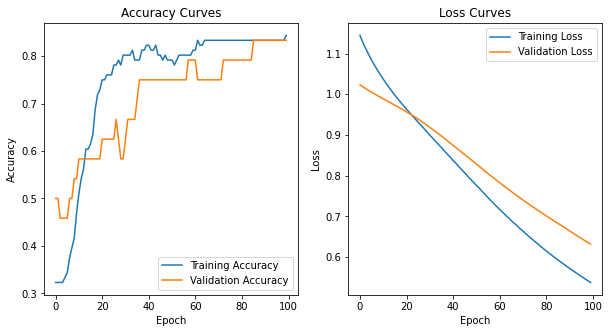

In [11]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

#### We can now evaluate our model to see how it performs on the testing set we created at the start.
We can use `evaluate()` to see how our model performs on the test set. This will take in the testing data and testing labels, and will return a variable which describes the various metrics we have defined our model to use. In this case it will return a list with the contents \[`loss`, `sparse_categorical_accuracy`\] averaged across our training samples.

In [12]:
results = model.evaluate(X_tst, y_tst)

print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

1/1 [==============================] - 0s 15ms/step - loss: 0.5960 - sparse_categorical_accuracy: 0.7333
Test set loss: 0.60, test set accuracy: 73.33%


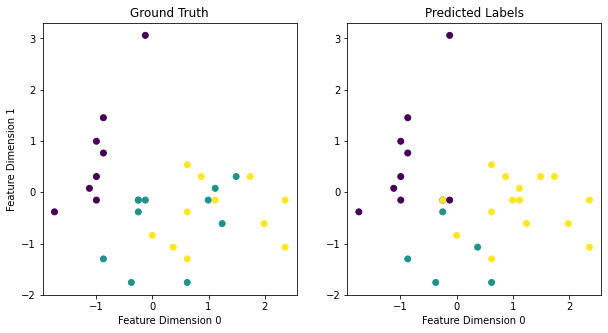

In [13]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.scatter(X_tst[:,0], X_tst[:,1], c=y_tst)
plt.ylabel('Feature Dimension 1')
plt.xlabel('Feature Dimension 0')
plt.title('Ground Truth')
plt.subplot(122)
plt.title('Predicted Labels')
plt.xlabel('Feature Dimension 0')
plt.scatter(X_tst[:,0], X_tst[:,1], c=np.argmax(model.predict(X_tst), axis=1))
plt.show()